This whole file is generated by ChatGPT :P

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

c:\Users\alanm\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
# Load the CSV file
csv_path = 'faceDataset/faces.csv'
df = pd.read_csv(csv_path)

# Read the bounding box data
image_paths = df['image_name'].values
widths = df['width'].values
heights = df['height'].values
x0_values = df['x0'].values
y0_values = df['y0'].values
x1_values = df['x1'].values
y1_values = df['y1'].values

# Preprocess

In [3]:
# Initialize empty lists to store the preprocessed data
images = []
labels = []

# Iterate over the images
for i, image_path in enumerate(image_paths):
    # Read the image using OpenCV
    image = cv2.imread(os.path.join('faceDataset/images', image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Resize the image to a fixed size (e.g., 224x224)
    image = cv2.resize(image, (224, 224))
    
    # Normalize the image pixels to the range [0, 1]
    image = image.astype('float32') / 255.0
    
    # Append the preprocessed image to the list
    images.append(image)
    
    # Prepare the bounding box labels
    num_faces = len(x0_values[i]) if isinstance(x0_values[i], np.ndarray) else 1
    labels.append(np.array([[x0_values[i], y0_values[i], x1_values[i], y1_values[i]] for _ in range(num_faces)]))
    
# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the dataset

In [4]:
# Shuffle the data
images, labels = shuffle(images, labels, random_state=42)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the model

In [5]:
# Build the model
model = models.Sequential()
model.add(layers.Input(shape=(224, 224, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))  # Output layer with 4 units (x0, y0, x1, y1)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 452ms/step - loss: 175150.2031 - val_loss: 115369.1328
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 39s 459ms/step - loss: 110981.4609 - val_loss: 116864.8594
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 44s 523ms/step - loss: 127475.2344 - val_loss: 115205.0469
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 47s 557ms/step - loss: 109503.7969 - val_loss: 114795.4375
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 596ms/step - loss: 115381.5156 - val_loss: 113631.6406
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - loss: 121422.2422 - val_loss: 112837.9609
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 599ms/step - loss: 100612.0703 - val_loss: 113145.4922
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 585ms/step - loss: 117099.8984 - val_loss: 115852.5938
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 48s 568ms/step - loss: 112643.3984 - val_loss: 115663.0312
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 600ms/step - loss: 98716.1562 - val_loss: 138938.8438


In [23]:
model.save('face_detection_model.keras')

# Load the model and continue training

In [19]:
# Load the saved model
loaded_model = load_model('face_detection_model.keras')

c:\Users\alanm\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [20]:
# Continue training the model
loaded_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 34s 405ms/step - loss: 96413.9922 - val_loss: 113290.0547
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 37s 447ms/step - loss: 117994.6953 - val_loss: 119217.1719
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 478ms/step - loss: 115671.1953 - val_loss: 115077.2188
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 43s 515ms/step - loss: 129488.7188 - val_loss: 114710.6484
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 48s 573ms/step - loss: 109683.1719 - val_loss: 113882.2656
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 583ms/step - loss: 116409.3203 - val_loss: 112814.3281
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 598ms/step - loss: 113999.7266 - val_loss: 112449.2656
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 51s 604ms/step - loss: 116454.7734 - val_loss: 114983.9766
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 592ms/step - loss: 108176.0547 - val_loss: 112854.4375
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 585ms/step - loss: 107901.0469 - val_loss: 112960.2031


In [21]:
model = loaded_model

# Use the trained model to predict bounding boxes

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


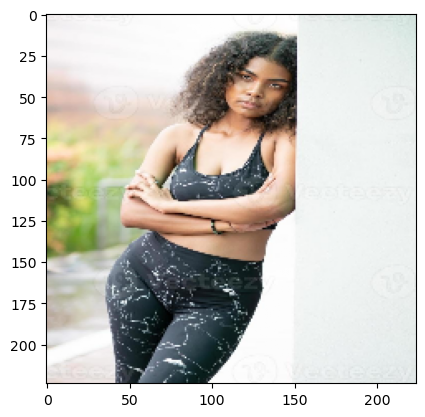

In [22]:
# Use the trained model to predict bounding boxes for test images
y_pred = model.predict(test_images)

# Display the first test image with the predicted bounding boxes
plt.imshow(test_images[0])
x0 = y_pred[0][0]
y0 = y_pred[0][1]
x1 = y_pred[0][2]
y1 = y_pred[0][3]
plt.gca().add_patch(plt.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

In [15]:
print(y_pred)
print(y_pred[0])
print(y_pred[0][0])

[[535.64325 224.40532 908.6351  588.083  ]
 [491.20642 204.37483 832.61255 536.3357 ]
 [476.18857 199.30411 807.3325  522.1851 ]
 ...
 [523.2732  219.27397 888.2085  574.2059 ]
 [536.2233  224.45447 909.4865  587.86707]
 [493.48196 206.90923 838.28516 542.88385]]
[535.64325 224.40532 908.6351  588.083  ]
535.64325
